### Student Information
Name:

Student ID:

GitHub ID: 

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Second

In [ ]:
### Begin Assignment Here
import pandas as pd
import utils as dmh

categories = ["positive", "negtive"]
pd_output = []

for file_name in ["amazon_cells_labelled", "imdb_labelled", "yelp_labelled"]:
    with open('sentiment_labelled_sentences/{}.txt'.format(file_name)) as f:
        lines = f.readlines()
        print(lines[0].split("\t")[0])
        X = pd.DataFrame(dmh.format_rows(lines), columns= ['text', 'label'])
        X['label_status'] = X.label.apply(lambda l: dmh.format_labels(l))
        pd_output.append(X)
# print(pd_output)

pd_total = pd.DataFrame()
for pd_data in pd_output:
    pd_total = pd.concat([pd_total, pd_data], axis=0)
pd_total.reset_index(inplace=True)
pd_total.drop(['index'], axis=1, inplace=True)
display(pd_total)
pd_total.to_csv("total_pd.csv")

So there is no way for me to plug it in here in the US unless I go by a converter.
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
Wow... Loved this place.


,text,label,label_status
0,So there is no way for me to plug it in here i...,0,negtive
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negtive
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negtive
2996,Appetite instantly gone.,0,negtive
2997,Overall I was not impressed and would not go b...,0,negtive
2998,"The whole experience was underwhelming, and I ...",0,negtive


In [ ]:
#Sample
pd_total.sample(n=10)

,text,label,label_status
1755,Nine out of ten for a truly lovely film.,1,positive
381,you can even take self portraits with the outs...,1,positive
732,T-Mobile has the best customer service anywhere.,1,positive
343,New Battery works great in phone.,1,positive
886,I didn't want the clip going over the top of m...,0,negtive
2981,We started with the tuna sashimi which was bro...,0,negtive
1918,"I agree with Jessica, this movie is pretty bad.",0,negtive
1176,Artless camera-work endlessly presents us with...,0,negtive
768,Great product.,1,positive
964,It's pretty easy.,1,positive


In [ ]:
# catch all positive sentiment
# df.loc[df['Courses'] == value]
pos_sentiment = pd_total.loc[pd_total['label_status'] == "positive"]
pos_sentiment = pos_sentiment.reset_index()
pos_sentiment_10th = pos_sentiment.iloc[::10]
pos_sentiment_10th[:5]

,index,text,label,label_status
0,1,"Good case, Excellent value.",1,positive
10,21,I bought this to use with my Kindle Fire and a...,1,positive
20,44,Excellent bluetooth headset.,1,positive
30,61,I really recommend this faceplates since it lo...,1,positive
40,78,"I love this phone , It is very handy and has a...",1,positive


In [ ]:
# get null value count in each column
pd_total.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_status
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [ ]:
# get null value count in each row
pd_total.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)
display(pd_total)

,text,label,label_status
0,So there is no way for me to plug it in here i...,0,negtive
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negtive
4,The mic is great.,1,positive
...,...,...,...
2995,I think food should have flavor and texture an...,0,negtive
2996,Appetite instantly gone.,0,negtive
2997,Overall I was not impressed and would not go b...,0,negtive
2998,"The whole experience was underwhelming, and I ...",0,negtive


In [ ]:
pd_total.duplicated(keep='last')

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [ ]:
pd_total.drop_duplicates(keep="last", inplace=True)
pd_total.reset_index(inplace=True)
pd_total.drop(['index'], axis=1, inplace=True)
pd_total

,text,label,label_status
0,So there is no way for me to plug it in here i...,0,negtive
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negtive
4,The mic is great.,1,positive
...,...,...,...
2978,I think food should have flavor and texture an...,0,negtive
2979,Appetite instantly gone.,0,negtive
2980,Overall I was not impressed and would not go b...,0,negtive
2981,"The whole experience was underwhelming, and I ...",0,negtive


negtive     1493
positive    1490
Name: label_status, dtype: int64


<AxesSubplot:title={'center':'status'}>

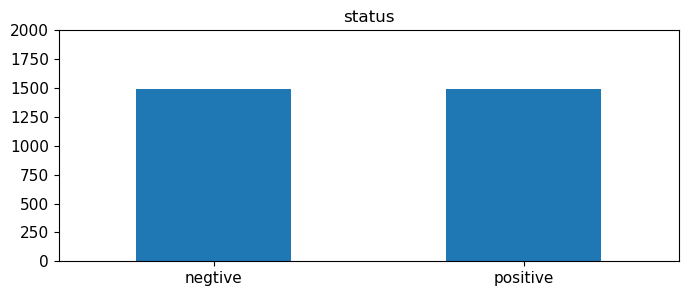

In [ ]:
import matplotlib.pyplot as plt

print(pd_total.label_status.value_counts())
pd_total.label_status.value_counts().plot(kind = 'bar',
                                    title = 'status',
                                    ylim = [0, 2000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

501
negtive     501
positive    499
Name: label_status, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

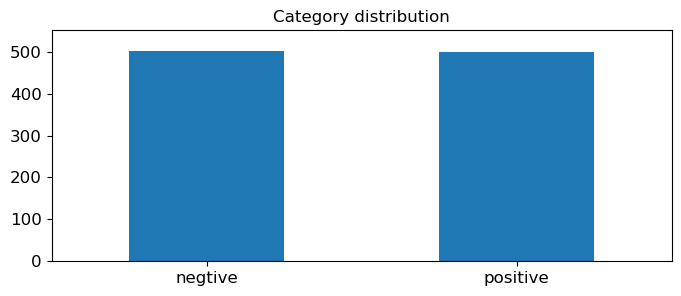

In [ ]:
X_sample = pd_total.sample(n=1000,random_state=42)
print(max(X_sample.label_status.value_counts()))
upper_bound = max(X_sample.label_status.value_counts() + 50) #277 + 50
print(X_sample.label_status.value_counts())

X_sample.label_status.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

['positive', 'negtive']
<PandasArray>
[1490, 1493]
Length: 2, dtype: int64
<PandasArray>
[499, 501]
Length: 2, dtype: int64


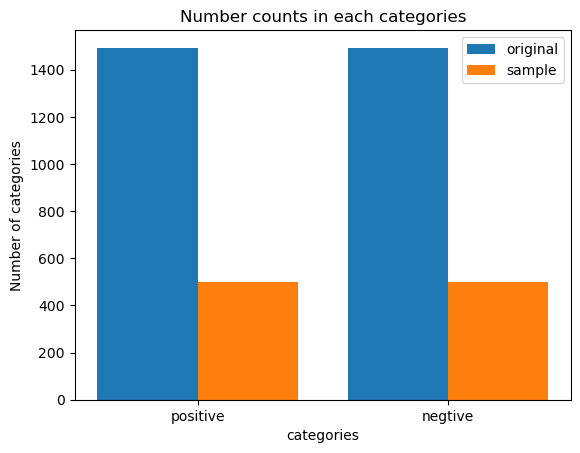

In [ ]:
import seaborn as sns
import numpy as np
data_1=pd_total.label_status.value_counts().reindex(categories)
data_2=X_sample.label_status.value_counts().reindex(categories)
count_1 = data_1.array
count_2 = data_2.array
print(categories)
print(count_1)
print(count_2)

X_axis = np.arange(len(categories)) 
plt.bar(X_axis-0.2, count_1, 0.4, label = 'original') 
plt.bar(X_axis+0.2, count_2, 0.4, label = 'sample') 
plt.xticks(X_axis, categories) 
plt.xlabel("categories") 
plt.ylabel("Number of categories") 
plt.title("Number counts in each categories") 
plt.legend() 
plt.show() 

In [ ]:
pd_total['unigrams'] = pd_total['text'].apply(lambda x: dmh.tokenize_text(x))
pd_total[0:5]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(pd_total.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [ ]:
count_vect.get_feature_names_out()[2314]

'in'

In [ ]:
analyze = count_vect.build_analyzer()
analyze(pd_total.text[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [ ]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [ ]:
X_counts.shape

(2983, 5155)

In [ ]:
hot_idx = []
for i, hot_point in enumerate(X_counts[0, 0:3000].toarray()[0]):
    if hot_point == 0:
        continue
    else:
        hot_idx.append(i)

for idx in hot_idx:
    print(count_vect.get_feature_names_out()[idx])

by
converter
for
go
here
in
is
it
me


[2326, 1328, 2031, 2546, 88, 1848, 1817, 1206, 2858, 1294, 2969, 1749, 862, 1674, 2691, 2757, 902, 1286, 873, 521, 1268, 1726, 102, 1922, 1101, 1894, 2341, 2209, 2768, 1629, 1951, 178, 2277, 492, 111, 654, 1526, 2103, 94, 2959]
[647, 3505, 2716, 2155, 4277, 653, 1959, 684, 939, 1937, 3444, 177, 4040, 1368, 1237, 161, 2117, 3750, 1822, 2857, 3867, 3974, 5042, 1152, 3581, 3621, 3483, 4679, 1698, 5147, 3010, 4696, 923, 5149, 1493, 4085, 964, 52, 906, 4145]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,term_by,term_prompt,term_loving,term_hence,term_stated,term_caesar,term_giant,term_cant,term_con,term_geeky,...,term_needless,term_trip,term_competitors,term_yun,term_electronics,term_simpler,term_connections,term_54,term_commented,term_smelled
doc_2326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


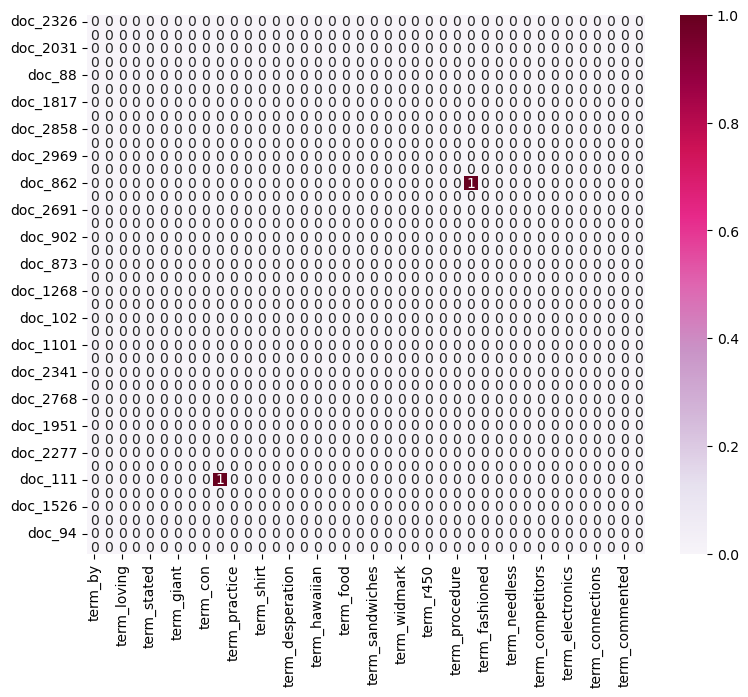

In [ ]:
import random
record_len, term_len = X_counts.shape
random_record_idx = random.sample(range(0, record_len), 40)
random_term_idx = random.sample(range(0, term_len), 40)
print(random_record_idx)
print(random_term_idx)

sample_x = count_vect.get_feature_names_out()[random_term_idx]
plot_x = ["term_"+str(i) for i in sample_x]
# sample_y = list(X.index)[random_record_idx]
plot_y = ["doc_"+ str(i) for i in random_record_idx]

# plot_z = X_counts[random_record_idx, random_term_idx].toarray() #X_counts[how many documents, how many terms]
plot_z = []
for i in random_record_idx:
    current_row = []
    for j in random_term_idx:
        current_row.append(X_counts[i, j])
    plot_z.append(current_row)
print(np.array(plot_z))
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

(2983, 3)


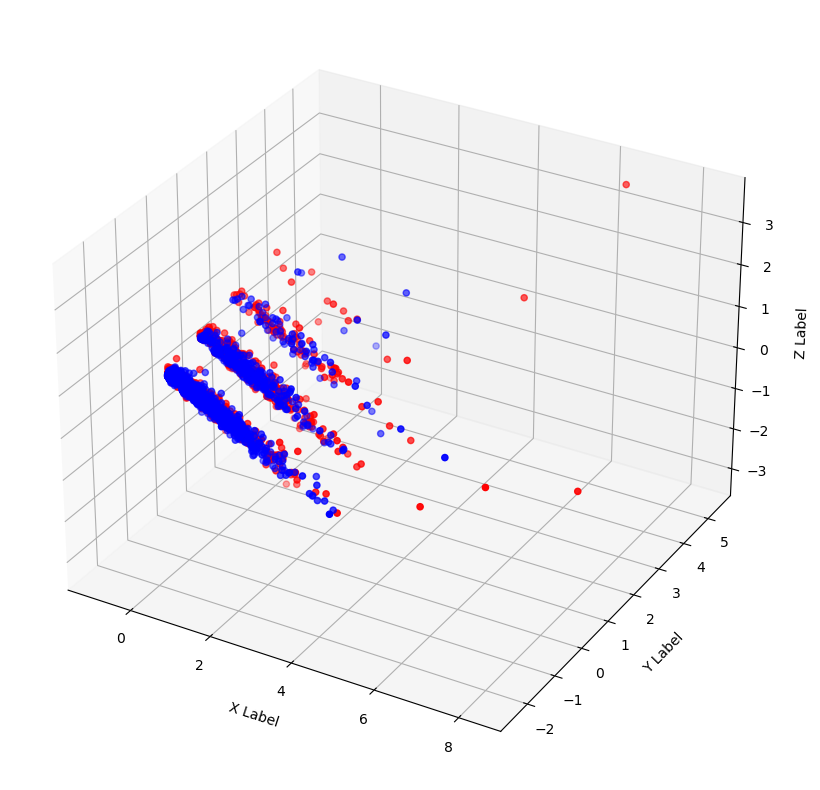

In [ ]:
from sklearn.decomposition import PCA

X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced_3d.shape)

col = ['red', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[pd_total['label_status'] == category].T[0]
    ys = X_reduced_3d[pd_total['label_status'] == category].T[1]
    zs = X_reduced_3d[pd_total['label_status'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [ ]:
import plotly.express as px

term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

d = {'term_name': count_vect.get_feature_names_out()[:30], 'count': term_frequencies[:30]}
df = pd.DataFrame(data=d)

fig = px.bar(df, x='term_name', y='count')
fig.show()

5155
[ 1 36  3 ...  1  2  1]


In [ ]:
sort_idx, sort_count = [], []
sort_freq = sorted(enumerate(term_frequencies), key=lambda i: i[1], reverse=True)
for idx, count in sort_freq:
    sort_idx.append(idx)
    sort_count.append(count)
sort_term = count_vect.get_feature_names_out()[sort_idx]

d = {'term_name': sort_term[:30], 'count': sort_count[:30]}
df = pd.DataFrame(data=d)

fig = px.bar(df, x='term_name', y='count')
fig.show()

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(pd_total.label)

pd_total['bin_category'] = mlb.transform(pd_total['label']).tolist()
pd_total[0:9]

,text,label,label_status,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negtive,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negtive,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negtive,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negtive,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negtive,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# Third

['the' 'and' 'it' ... 'z500a' 'zillion' 'zombiez']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 1]]


,term_the,term_and,term_it,term_is,term_to,term_this,term_of,term_was,term_in,term_for,...,term_had,term_at,term_food,term_like,term_just,term_place,term_there,term_time,term_service,term_an
sentiment_80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentiment_295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentiment_921,1,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
sentiment_1759,2,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
sentiment_1361,1,0,2,0,1,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
sentiment_1902,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentiment_111,0,2,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentiment_2076,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
sentiment_960,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
sentiment_164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


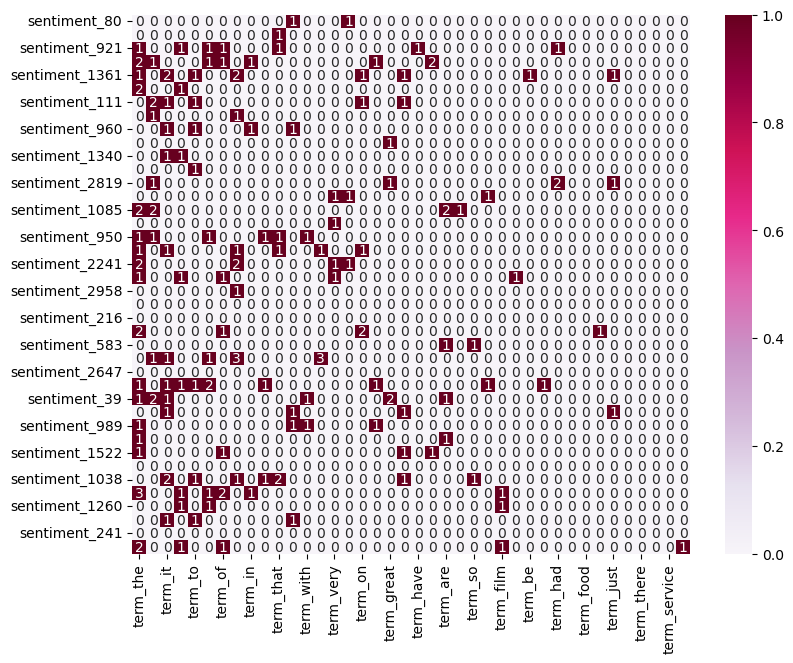

In [ ]:
# 3-1 homeWork
record_len, term_len = X_counts.shape
random_record_idx = random.sample(range(0, record_len), 40)

sort_idx, sort_count = [], []
sort_freq = sorted(enumerate(term_frequencies), key=lambda i: i[1], reverse=True)

for idx, count in sort_freq:
    sort_idx.append(idx)
    sort_count.append(count)
sort_term = count_vect.get_feature_names_out()[sort_idx]
print(sort_term)

plot_x = ["term_"+str(i) for i in sort_term[:40]]
# sample_y = list(X.index)[random_record_idx]
plot_y = ["sentiment_"+ str(i) for i in random_record_idx]

plot_z = []
for i in random_record_idx:
    current_row = []
    for j in sort_idx[:40]:
        current_row.append(X_counts[i, j])
    plot_z.append(current_row)
print(np.array(plot_z))
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [ ]:
# 3-2 homeWork
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(pd_total.text)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)

       00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  


In [ ]:
# 3-3 homeWork
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(pd_total.text, pd_total.label, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

y_pred = classifier.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

#################################################
tfidf_vectorizer = TfidfVectorizer()

X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

classifier.fit(X_train_vec, y_train)
y_pred = classifier.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8509212730318257
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       296
           1       0.85      0.85      0.85       301

    accuracy                           0.85       597
   macro avg       0.85      0.85      0.85       597
weighted avg       0.85      0.85      0.85       597

Accuracy: 0.8609715242881072
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       296
           1       0.85      0.87      0.86       301

    accuracy                           0.86       597
   macro avg       0.86      0.86      0.86       597
weighted avg       0.86      0.86      0.86       597



Count Vectorization:<br>
This approach represents a document as a vector where each dimension corresponds to a unique word in the entire corpus, and the value in each dimension is the count of how many times that word appears in the document. It only takes into account the frequency of words within the document.<br>

TF-IDF Features: <br>
TF-IDF represents a document as a vector where each dimension corresponds to a unique word in the entire corpus. However, the value in each dimension is not just the word count; it is a weighted value that considers the frequency of the word in the document (TF) and its importance in the entire corpus (IDF).<br>

# Fourth

1. Parallel Processing:<br>
    Utilize multi-core processors by implementing parallel processing. Libraries like multiprocessing allow you to distribute tasks across multiple cores, speeding up computation.<br>
    
2. Data Filtering and Reduction:<br>
    Reduce the amount of data you need to process. If you can, filter out irrelevant data early in the process.Use sampling or data aggregation techniques to work with smaller subsets of your data when feasible.
    
3. Optimize Algorithms and Data Structures:<br>
    Choose the right algorithms and data structures for your problem. Some algorithms are more efficient for specific tasks.Use data structures like dictionaries, sets, and trees when they provide better time complexity for your operations.